In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Simulate data for 100,000 patients
np.random.seed(42)
n_samples = 100000
experiencia = np.random.choice(['Alto', 'Medio', 'Bajo'], size=n_samples)
salud = np.random.choice(['Alta', 'Media', 'Baja'], size=n_samples)
equipamiento = np.random.choice(['Avanzado', 'Básico'], size=n_samples)
exito_mision = np.zeros(n_samples)

In [6]:
for i in range(n_samples):
    # Probabilidad base de éxito
    prob = 0.4 
    if experiencia[i] == 'Alto': prob += 0.3
    if salud[i] == 'Alta': prob += 0.2
    if equipamiento[i] == 'Avanzado': prob += 0.1
    
    # Aseguramos que no pase de 1 o baje de 0
    prob = max(0.01, min(0.99, prob))
    
    # 1 significa "Sí" (Éxito), 0 significa "No" (Falla)
    exito_mision[i] = np.random.choice([1, 0], p=[prob, 1-prob])

In [7]:
df_mision = pd.DataFrame({
    'Experiencia': experiencia,
    'Salud': salud,
    'Equipamiento': equipamiento,
    'Exito': exito_mision
})

In [8]:
# Calculate conditional probabilities
prob_exito = df_mision.groupby(['Experiencia', 'Salud', 'Equipamiento'])['Exito'].mean().reset_index()

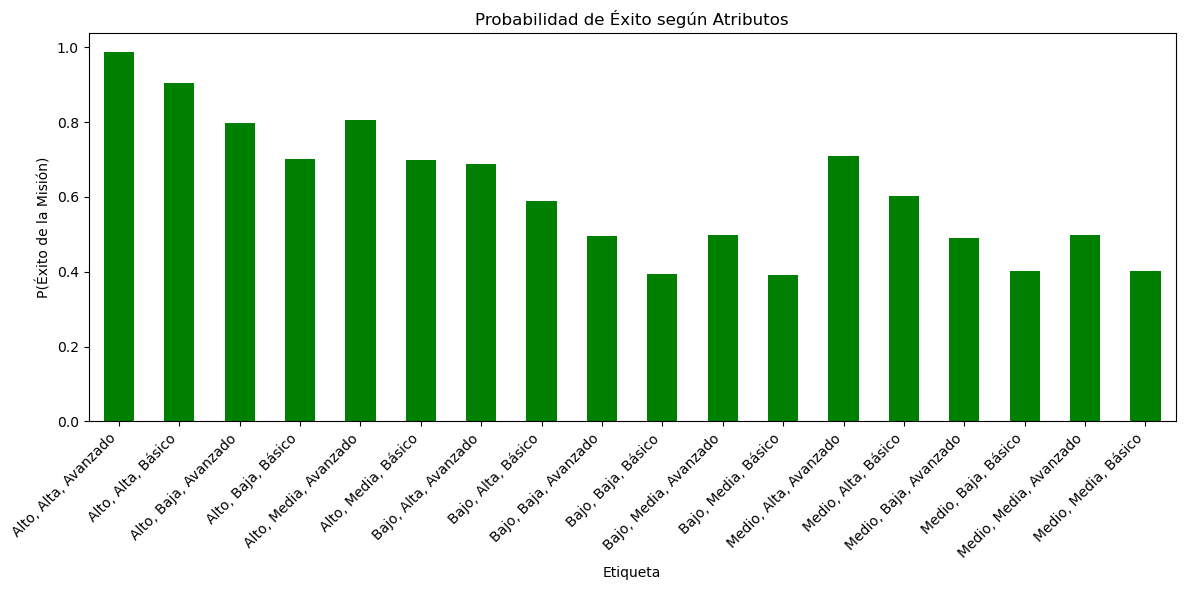

In [9]:
prob_exito['Etiqueta'] = (prob_exito['Experiencia'] + ", " + 
                          prob_exito['Salud'] + ", " + 
                          prob_exito['Equipamiento'])

fig, ax = plt.subplots(figsize=(12, 6))
prob_exito.plot(kind='bar', x='Etiqueta', y='Exito', ax=ax, color='green', legend=False)
ax.set_ylabel('P(Éxito de la Misión)')
ax.set_title('Probabilidad de Éxito según Atributos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()